In [58]:
from templates import *
import cv2
import imageio
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import imageio
from PIL import Image

In [5]:
device = 'cuda:0'
conf = ffhq256_autoenc()
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'ckpt/ffhq_256/last.ckpt', map_location='cpu')
model.load_state_dict(state['state_dict'], strict=False)
model.ema_model.eval()
model.ema_model.to(device);

Global seed set to 0


Model params: 160.69 M


In [59]:
# data_root='/home/v-houxingren/cjh/dataset/CelebA-HQ/style/images/'
data_root = 'F://Dataset/ffhq/cmp_ori'
xt_root = 'H://pku/coding_test/coding_comparison/For_diffae/xt/'

In [61]:
data = ImageDataset(data_root, image_size=conf.img_size, exts=['jpg', 'JPG', 'png'], do_augment=False)
print(len(data.paths))
print((data.paths))
dataloader = DataLoader(data,
                       batch_size = 1,
                       num_workers = 1,
                       shuffle = False)

16
[WindowsPath('169.jpg'), WindowsPath('21205.jpg'), WindowsPath('21334.jpg'), WindowsPath('46293.jpg'), WindowsPath('46690.jpg'), WindowsPath('46725.jpg'), WindowsPath('46954.jpg'), WindowsPath('46988.jpg'), WindowsPath('169.jpg'), WindowsPath('21205.jpg'), WindowsPath('21334.jpg'), WindowsPath('46293.jpg'), WindowsPath('46690.jpg'), WindowsPath('46725.jpg'), WindowsPath('46954.jpg'), WindowsPath('46988.jpg')]


In [50]:
len(dataloader)
# print(data[15]['path'])

16

In [48]:
for i,data_i in enumerate(dataloader):
    if i>10:
        break
    imgs = data_i['img']
#     print(imgs.shape)
    cond = model.encode(imgs.to(device)) 
    xT = model.encode_stochastic(imgs.to(device), cond, T=250)
    xT = xT.cpu().detach().numpy()
    print(np.min(xT),np.max(xT))
    xT = xT * 2
    xT = np.round(xT).astype(int)
    xT = xT + 24
    print(np.min(xT),np.max(xT))
    xT = xT.astype(np.uint8)
    xT = np.transpose(xT,(0,2,3,1))
    name = os.path.join(xt_root,data_i['path'].split('.')[0]+'.png')
    imageio.imsave(name,xT[0])

    # xenc.append(xT.cpu().detach().numpy().astype(np.float32))

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "C:\Users\cjh09\Anaconda3\envs\ldm\lib\site-packages\torch\utils\data\_utils\worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "C:\Users\cjh09\Anaconda3\envs\ldm\lib\site-packages\torch\utils\data\_utils\fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "C:\Users\cjh09\Anaconda3\envs\ldm\lib\site-packages\torch\utils\data\_utils\collate.py", line 73, in default_collate
    return {key: default_collate([d[key] for d in batch]) for key in elem}
  File "C:\Users\cjh09\Anaconda3\envs\ldm\lib\site-packages\torch\utils\data\_utils\collate.py", line 73, in <dictcomp>
    return {key: default_collate([d[key] for d in batch]) for key in elem}
  File "C:\Users\cjh09\Anaconda3\envs\ldm\lib\site-packages\torch\utils\data\_utils\collate.py", line 85, in default_collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'pathlib.WindowsPath'>


In [103]:
# for i in range(len(xenc)):
#     if i == 0:
#         codes = xenc[i]
#     else:
#         codes = np.concatenate((codes,xenc[i]),axis=0)

In [104]:
codes = codes / 0.5
codes = np.round(codes).astype(int)
# codes = codes + 24

In [105]:
codes = codes + 24

In [106]:
codes = codes.astype(np.uint8)

In [109]:
codes = np.transpose(codes,(0,2,3,1))
codes.shape

(22, 256, 256, 3)

In [110]:
save_path = "test/xt/"

In [111]:
for i in range(codes.shape[0]):
    name = os.path.join(save_path,str(i)+'.png')
    imageio.imsave(name,codes[i])

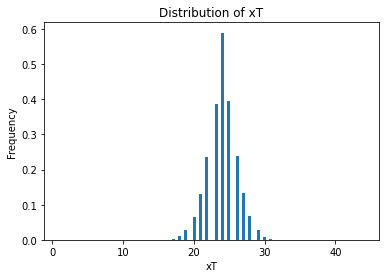

In [57]:
plt.hist(codes.flatten(), 100, density=True)
plt.xlabel('xT')
plt.ylabel('Frequency')
plt.title('Distribution of xT')
plt.show()

In [107]:
np.min(codes)

1

In [108]:
np.max(codes)

44

In [42]:
np.mean(codes)

0.004473167

In [38]:
np.std(codes)

2.0402167

In [65]:
xt_path = 'test/xt_vvc_36'

In [77]:
def get_xt(i):
    xtp=os.path.join(xt_path,str(i)+'.jpg')
    xtp = imageio.imread(xtp)
    xtp = np.asarray(xtp)
    print(xtp.shape,np.min(xtp),np.max(xtp))
    xtp = np.transpose(xtp,(2,0,1))
    xtp = np.expand_dims(xtp,axis=0)
#     xt = (xtp-24)*2
#     print(xt.shape,xt)

In [78]:
get_xt(1)

(256, 256, 3) 82 197


/tmp/ipykernel_18831/1179264662.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  xtp = imageio.imread(xtp)


In [83]:
xt1 =Image.open("test/xt/1.png")
xt1 = np.asarray(xt1)
print(xt1)
print(xt1.shape,np.min(xt1),np.max(xt1))

[[[138 149 127]
  [149 149 138]
  [149 138 138]
  ...
  [138 149 138]
  [138 149 127]
  [149 149 149]]

 [[149 138 149]
  [138 149 149]
  [138 138 138]
  ...
  [138 138 138]
  [138 138 149]
  [127 127 149]]

 [[138 138 149]
  [138 138 138]
  [138 138 138]
  ...
  [138 138 138]
  [138 138 138]
  [138 127 138]]

 ...

 [[181 149 127]
  [170 159 159]
  [117 191 117]
  ...
  [138 138 138]
  [149 149 138]
  [159 149 149]]

 [[127 127 117]
  [106 149 117]
  [127 138 149]
  ...
  [127 127 127]
  [138 138 127]
  [149 138 149]]

 [[ 85 138 149]
  [149 106 159]
  [117 170 149]
  ...
  [117 117 127]
  [138 138 138]
  [127 138 149]]]
(256, 256, 3) 0 255


In [ ]:
for i,data_i in enumerate(dataloader):
#     if i>10:
#         break
    imgs = data_i['img']
#     print(imgs.shape)
    cond = model.encode(imgs.to(device)) 
    xtp=os.path.join()